In [2]:
from IPython.display import Image
import matplotlib.pyplot as plt
import sys
import pickle
from sklearn import preprocessing
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
sys.path.append("../tools/")
import pandas as pd


from feature_format import featureFormat
from feature_format import targetFeatureSplit

### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi"]

### load the dictionary containing the dataset
data_dict = pickle.load(open("final_project_dataset.pkl", "rb") )


    
df = pd.DataFrame(object)
df.to_csv(r'final_project_dataset.csv')

ValueError: DataFrame constructor not properly called!

In [4]:
df = pd.DataFrame(data_dict)
df = df.T
df.to_csv(r'final_project_dataset.csv')
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,...,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
METTS MARK,365788,807,NaN,1061827,NaN,600000,mark.metts@enron.com,NaN,NaN,585062,...,38,NaN,29,1740,1,False,NaN,702,585062,NaN
BAXTER JOHN C,267102,NaN,1295738,5634343,NaN,1200000,NaN,NaN,-1386055,10623258,...,NaN,6680544,NaN,2660303,NaN,False,1586055,NaN,3942714,NaN
ELLIOTT STEVEN,170941,NaN,NaN,211725,NaN,350000,steven.elliott@enron.com,NaN,-400729,6678735,...,NaN,4890344,NaN,12961,NaN,False,NaN,NaN,1788391,NaN
CORDES WILLIAM R,NaN,764,NaN,NaN,NaN,NaN,bill.cordes@enron.com,NaN,NaN,1038185,...,10,651850,12,NaN,0,False,NaN,58,386335,NaN
HANNON KEVIN P,243293,1045,NaN,288682,NaN,1500000,kevin.hannon@enron.com,NaN,-3117011,6391065,...,32,5538001,32,11350,21,True,1617011,1035,853064,NaN


Text(0, 0.5, 'bonus')

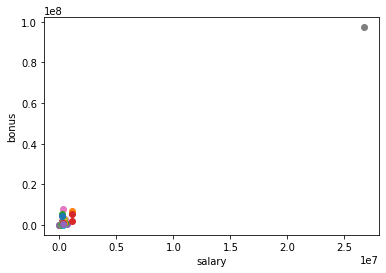

In [2]:
features = ["salary", "bonus"]
#data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)
### plot features
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")
#plt.show()

In [3]:
### remove any outliers before proceeding further
features = ["salary", "bonus"]
data_dict.pop('TOTAL', 0)
data = featureFormat(data_dict, features)

### remove NAN's from dataset
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key, int(val)))

outliers_final = (sorted(outliers,key=lambda x:x[1],reverse=True)[:4])
### print top 4 salaries
print (outliers_final)

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321), ('FREVERT MARK A', 1060932), ('PICKERING MARK R', 655037)]


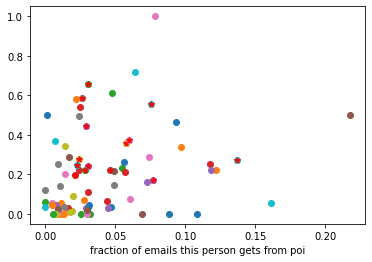

In [4]:
### create new features
### new features are: fraction_to_poi_email,fraction_from_poi_email

def dict_to_list(key,normalizer):
    new_list=[]

    for i in data_dict:
        if data_dict[i][key]=="NaN" or data_dict[i][normalizer]=="NaN":
            new_list.append(0.)
        elif data_dict[i][key]>=0:
            new_list.append(float(data_dict[i][key])/float(data_dict[i][normalizer]))
    return new_list

### create two lists of new features
fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")

### insert new features into data_dict
count=0
for i in data_dict:
    data_dict[i]["fraction_from_poi_email"]=fraction_from_poi_email[count]
    data_dict[i]["fraction_to_poi_email"]=fraction_to_poi_email[count]
    count +=1

    
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email"]    
    ### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)

### plot new features
for point in data:
    from_poi = point[1]
    to_poi = point[2]
    plt.scatter( from_poi, to_poi )
    if point[0] == 1:
        plt.scatter(from_poi, to_poi, color="r", marker="*")
plt.xlabel("fraction of emails this person gets from poi")
plt.show()

In [7]:
features_list = ["poi", "salary", "bonus", "fraction_from_poi_email", "fraction_to_poi_email",
                 'deferral_payments', 'total_payments', 'loan_advances', 'restricted_stock_deferred',
                 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options',
                 'long_term_incentive', 'shared_receipt_with_poi', 'restricted_stock', 'director_fees']
data = featureFormat(my_dataset, features_list)

### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)

### split data into training and testing datasets
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.1, random_state=42)




from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
pred= clf.predict(features_test)
print ('accuracy', score)

print ("Decision tree algorithm time:", round(time()-t0, 3), "s")



importances = clf.feature_importances_
import numpy as np
indices = np.argsort(importances)[::-1]
print ('Feature Ranking: ')
for i in range(16):
    print( "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]]))


accuracy 0.9333333333333333
Decision tree algorithm time: 0.004 s
Feature Ranking: 
1 feature salary (0.26448890815594345)
2 feature bonus (0.15577986725663714)
3 feature fraction_from_poi_email (0.15289190897597976)
4 feature fraction_to_poi_email (0.10927179044755912)
5 feature deferral_payments (0.0691209042951744)
6 feature total_payments (0.06320367028331626)
7 feature loan_advances (0.06115676359039192)
8 feature restricted_stock_deferred (0.057079646017699104)
9 feature deferred_income (0.05351216814159292)
10 feature total_stock_value (0.013494372835705908)
11 feature expenses (0.0)
12 feature exercised_stock_options (0.0)
13 feature long_term_incentive (0.0)
14 feature shared_receipt_with_poi (0.0)
15 feature restricted_stock (0.0)
16 feature director_fees (0.0)


In [9]:
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", "shared_receipt_with_poi"]

### try Naive Bayes for prediction
t0 = time()

clf = GaussianNB()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
print ('accuracy')

print ("NB algorithm time:", round(time()-t0, 3), "s")

accuracy
NB algorithm time: 0.004 s


In [10]:
### use manual tuning parameter min_samples_split
clf = DecisionTreeClassifier(min_samples_split=5)

In [43]:
!pip uninstall scikit-learn
# import sklearn
# sklearn.__version__

^C


In [44]:
pip install scikit-learn==0.16

  Using cached scikit-learn-0.16.0.tar.gz (7.3 MB)
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1
    Running setup.py install for scikit-learn: started
    Running setup.py install for scikit-learn: finished with status 'error'
  Rolling back uninstall of scikit-learn
  Moving to c:\users\varesse\anaconda3\lib\site-packages\scikit_learn-1.0.1.dist-info\
   from C:\Users\Varesse\anaconda3\Lib\site-packages\~cikit_learn-1.0.1.dist-info
  Moving to c:\users\varesse\anaconda3\lib\site-packages\sklearn\
   from C:\Users\Varesse\anaconda3\Lib\site-packages\~klearn
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Varesse\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Varesse\\AppData\\Local\\Temp\\pip-install-d3fa8kzf\\scikit-learn_99c33b889aed46bfb439811c2d39e722\\setup.py'"'"'; __file__='"'"'C:\\Users\\Varesse\\AppData\\Local\\Temp\\pip-install-d3fa8kzf\\scikit-learn_99c33b889aed46bfb439811c2d39e722\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Varesse\AppData\Local\Temp\pip-wheel-xc2w6smb'
       cwd: C:\Users\Varesse\AppData\Local\Temp\pip-install-d3fa8kzf\scikit-learn_99c33b889aed46bfb439811c2d39e722\
  Complete output (531 lines):
  Partial import of sklearn during the build process.
  blas_opt_info:
  blas_mkl_info:


    copying sklearn\metrics\cluster\bicluster.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster
    copying sklearn\metrics\cluster\setup.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster
    copying sklearn\metrics\cluster\supervised.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster
    copying sklearn\metrics\cluster\unsupervised.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster
    copying sklearn\metrics\cluster\__init__.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster
    creating build\lib.win-amd64-3.9\sklearn\metrics\cluster\tests
    copying sklearn\metrics\cluster\tests\test_bicluster.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster\tests
    copying sklearn\metrics\cluster\tests\test_supervised.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster\tests
    copying sklearn\metrics\cluster\tests\test_unsupervised.py -> build\lib.win-amd64-3.9\sklearn\metrics/cluster\tests
    copying sklearn\metrics\cluster\tests\__init__.py -> build\lib.win-amd64-3.

In [36]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi", "fraction_from_poi_email", "fraction_to_poi_email", 'shared_receipt_with_poi']


### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print( 'accuracy before tuning ', score)

print ("Decision tree algorithm time:", round(time()-t0, 3), "s")


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print ("Validating algorithm:")
print ("accuracy after tuning = ", acc)

# function for calculation ratio of true positives
# out of all positives (true + false)
print ('precision = ', precision_score(labels_test,pred))

# function for calculation ratio of true positives
# out of true positives and false negatives
print ('recall = ', recall_score(labels_test,pred))

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\Varesse\anaconda3\lib\site-packages\sklearn\__init__.py)

In [45]:
for iteration, data in enumerate(kf.split(X, y=None, groups=None), start=1):
    print('{:^9} {} {!s:^25}'.format(iteration, data[0], data[1]))

NameError: name 'X' is not defined